# Preparation

In [2]:
#!pip install --upgrade mplfinance
#!pip install --upgrade openpyxl
#!pip install tabulate

In [3]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
import os
import pandas as pd
import matplotlib as mpl
import mplfinance as mpf
import openpyxl
import tabulate
from pathlib import Path
import numpy as np
from datetime import date, datetime

# Data Import

In [5]:
# Paths to files
all_coins_path = '../coin-prices/'
btc_path = '../coin-prices/btc/'
doge_path = '../coin-prices/doge/'
eth_path = '../coin-prices/eth/'

In [6]:
# File Names
all_coins_daily_2y_file = 'all_coins_daily_2y_2021-07-04.csv'
all_coins_daily_ytd_file = 'all_coins_daily_ytd_2021-07-04.csv'
all_coins_weekly_2y_file = 'all_coins_weekly_2y_2021-07-04.csv'
btc_daily_2y_file = 'btc_daily_2y_2021-07-04.csv'
btc_daily_ytd_file = 'btc_daily_ytd_2021-07-04.csv'
btc_weekly_2y_file = 'btc_weekly_2y_2021-07-04.csv'
btc_weekly_ytd_file = 'btc_weekly_ytd_2021-07-04.csv'
doge_daily_2y_file = 'doge_daily_2y_2021-07-04.csv'
doge_daily_ytd_file = 'doge_daily_ytd_2021-07-04.csv'
doge_weekly_2y_file = 'doge_weekly_2y_2021-07-04.csv'
doge_weekly_ytd_file = 'doge_weekly_ytd_2021-07-04.csv'
eth_daily_2y_file = 'eth_daily_2y_2021-07-04.csv'
eth_daily_ytd_file = 'eth_daily_ytd_2021-07-04.csv'
eth_weekly_2y_file = 'eth_weekly_2y_2021-07-04.csv'
eth_weekly_ytd_file = 'eth_weekly_ytd_2021-07-04.csv'

In [7]:
# Import Data as Prepared beforehand
## Daily
btc_data = pd.read_csv(btc_path + btc_daily_2y_file, parse_dates = True, index_col = 0)
btc_data.index.name = 'Date'
doge_data = pd.read_csv(doge_path + doge_daily_2y_file, parse_dates = True, index_col = 0)
doge_data.index.name = 'Date'
eth_data = pd.read_csv(eth_path + eth_daily_2y_file, parse_dates = True, index_col = 0)
eth_data.index.name = 'Date'
## Weekly
btc_data_weekly = pd.read_csv(btc_path + btc_weekly_ytd_file, parse_dates = True, index_col = 0)
btc_data_weekly['WeekNumber'] = pd.DatetimeIndex(btc_data_weekly.index).isocalendar().week
btc_data_weekly['Date'] = btc_data_weekly.index
btc_data_weekly.set_index('WeekNumber', inplace = True)
#display(btc_data_weekly)
doge_data_weekly = pd.read_csv(doge_path + doge_weekly_ytd_file, parse_dates = True, index_col = 0)
doge_data_weekly['WeekNumber'] = pd.DatetimeIndex(doge_data_weekly.index).isocalendar().week
doge_data_weekly['Date'] = doge_data_weekly.index
doge_data_weekly.set_index('WeekNumber', inplace = True)
eth_data_weekly = pd.read_csv(eth_path + eth_weekly_ytd_file, parse_dates = True, index_col = 0)
eth_data_weekly['WeekNumber'] = pd.DatetimeIndex(eth_data_weekly.index).isocalendar().week
eth_data_weekly['Date'] = eth_data_weekly.index
eth_data_weekly.set_index('WeekNumber', inplace = True)

In [8]:
SA_results_path = '../results/'
results_file_name = 'sample-data.xlsx'
#results = openpyxl.load_workbook(SA_results_path + results_file_name) 
#sheet = results.active
#print(sheet.max_row, sheet.max_column)

results = pd.read_excel(SA_results_path + results_file_name, header = 0, index_col = False, keep_default_na = True)
results.rename(columns = {'Author':'Podcast'}, inplace = True)
results.sort_values(by = "Date")
#display(results)

,Date,Podcast,Title,Coin,Sentiment
159,2021-05-15,AltcoinDaily,Title3,ETH,bearish
160,2021-05-15,AltcoinDaily,Title3,BTC,bullish
161,2021-05-15,AltcoinDaily,Title3,DOGE,bearish
162,2021-05-15,AltcoinDaily,Title3,DOGE,bearish
156,2021-05-15,AltcoinDaily,Title3,BTC,bearish
...,...,...,...,...,...
134,2021-06-28,AltcoinDaily,Title1,DOGE,bullish
135,2021-06-28,AltcoinDaily,Title1,BTC,bullish
136,2021-06-28,AltcoinDaily,Title1,ETH,bearish
14,2021-06-28,Web3,This Week in Blockchain 1,ETH,bullish


# Extracting Data

## by Coin

In [9]:
BTC_signals = results.query('Coin == "BTC"')
DOGE_signals = results.query('Coin == "DOGE"')
ETH_signals = results.query('Coin == "ETH"')
list_of_coins = ("BTC", "DOGE", "ETH")
# print(list_of_coins)
number_of_sentiments_per_coin = results.groupby('Coin').size()
#print(number_of_sentiments_per_coin)
### by Coin = BTC
btc_sentiments_total = BTC_signals['Sentiment'].value_counts(dropna=False)
#print(btc_sentiments_total)
### by Coin = DOGE
doge_sentiments_total = DOGE_signals['Sentiment'].value_counts(dropna=False)
#print(doge_sentiments_total)
### by Coin = ETH
eth_sentiments_total = ETH_signals['Sentiment'].value_counts(dropna=False)
#print(eth_sentiments_total)

## by Podcast

In [10]:
# get all unique Podcasts (Podcast Name not Podcast Title)
# make query subsets for each unique podcast
list_of_podcasts = results.Podcast.unique()
# print(list_of_podcasts)
grouped_by_podcasts = results.groupby('Podcast')
#grouped_by_podcasts.head()
number_of_sentiments_per_podcasts = results.groupby('Podcast').size()
#print(number_of_sentiments_per_podcasts)

## by Date

In [11]:
list_of_dates = results.Date.unique()
#print(list_of_dates)
grouped_by_date = results.groupby('Date')
#grouped_by_date.head()
number_of_sentiments_per_date = results.groupby('Date').size()
#print(number_of_date)
sentiments_per_date = grouped_by_date['Sentiment'].value_counts(dropna=False)
#print(sentiments_per_date)

## by Sentiment

In [12]:
list_of_sentiments = ("bullish", "neutral", "bearish")
# print(list_of_sentiments)
number_of_sentiments = results.groupby('Sentiment').size()
#print(number_of_sentiments)

## Combining Data Extracts: Coin per Date

In [13]:
btc_grouped_by_date = BTC_signals.groupby('Date')
#btc_grouped_by_date.head()

## Combining Data Extracts: Coin per Sentiment

In [14]:
### Sentiment == Bullish
btc_bullish = BTC_signals.query('Sentiment == "bullish"')
#print(btc_bullish)
doge_bullish = DOGE_signals.query('Sentiment == "bullish"')
#print(doge_bullish)
eth_bullish = ETH_signals.query('Sentiment == "bullish"')
#print(eth_bullish)

### Sentiment == Bearish
btc_bearish = BTC_signals.query('Sentiment == "bearish"')
#print(btc_bearish)
doge_bearish = DOGE_signals.query('Sentiment == "bearish"')
#print(doge_bearish)
eth_bearish = ETH_signals.query('Sentiment == "bearish"')
#print(eth_bearish)

### Sentiment == Neutral
btc_neutral = BTC_signals.query('Sentiment == "neutral"')
#print(btc_neutral)
doge_neutral = DOGE_signals.query('Sentiment == "neutral"')
#print(doge_neutral)
eth_neutral = ETH_signals.query('Sentiment == "neutral"')
#print(eth_neutral)

### Special Case: Sentiment == bearish && Sentiment == neutral
btc_bearishn = BTC_signals.query('Sentiment != "bullish"')
#print(btc_bearishn)
doge_bearishn = DOGE_signals.query('Sentiment != "bullish"')
#print(doge_bearishn)
eth_bearishn = ETH_signals.query('Sentiment != "bullish"')
#print(eth_bearishn)

## Combining Data Extracts: Coin per Sentiment per Date

In [15]:
### Sentiment == bullish
btc_bullish_by_date = btc_bullish.groupby('Date').size()
btc_bullish_by_date.name = "BTC_bull_freq"
#btc_bullish_by_date.head()
doge_bullish_by_date = doge_bullish.groupby('Date').size()
doge_bullish_by_date.name = "DOGE_bull_freq"
#doge_bullish_by_date.head()
eth_bullish_by_date = eth_bullish.groupby('Date').size()
eth_bullish_by_date.name = "ETH_bull_freq"
#eth_bullish_by_date.head()

### Sentiment == bearish
btc_bearish_by_date = btc_bearish.groupby('Date').size()
btc_bearish_by_date.name = "BTC_bear_freq"
#btc_bearish_by_date.head()
doge_bearish_by_date = doge_bearish.groupby('Date').size()
doge_bearish_by_date.name = "DOGE_bear_freq"
#doge_bearish_by_date.head()
eth_bearish_by_date = eth_bearish.groupby('Date').size()
eth_bearish_by_date.name = "ETH_bear_freq"
#eth_bearish_by_date.head()

#### Sentiment == bearish && neutral
btc_bearishn_by_date = btc_bearishn.groupby('Date').size()
btc_bearishn_by_date.name = "BTC_bearn_freq"
#btc_bearishn_by_date.head()
doge_bearishn_by_date = doge_bearishn.groupby('Date').size()
doge_bearishn_by_date.name = "DOGE_bearn_freq"
#doge_bearishn_by_date.head()
eth_bearishn_by_date = eth_bearishn.groupby('Date').size()
eth_bearishn_by_date.name = "ETH_bearn_freq"
#eth_bearishn_by_date.head()

#### Sentiment == neutral
btc_neutral_by_date = btc_neutral.groupby('Date').size()
btc_neutral_by_date.name = "BTC_neutral_freq"
#btc_neutral_by_date.head()
doge_neutral_by_date = doge_neutral.groupby('Date').size()
doge_neutral_by_date.name = "DOGE_neutral_freq"
#doge_neutral_by_date.head()
eth_neutral_by_date = eth_neutral.groupby('Date').size()
eth_neutral_by_date.name = "ETH_neutral_freq"
#eth_neutral_by_date.head()

## Combining Data Extracts: Aggregate Sentiments by Sentiment Type

In [16]:
### Bullish
bullish_sentiment_collector = pd.merge(btc_bullish_by_date.to_frame(), doge_bullish_by_date.to_frame(), on = "Date")
bullish_sentiment_collector = pd.merge(bullish_sentiment_collector, eth_bullish_by_date.to_frame(), on = "Date")
display(bullish_sentiment_collector)

### Bearish
bearish_sentiment_collector = pd.merge(btc_bearish_by_date.to_frame(), doge_bearish_by_date.to_frame(), on = "Date")
bearish_sentiment_collector = pd.merge(bearish_sentiment_collector, eth_bearish_by_date.to_frame(), on = "Date")
#print(bearish_sentiment_collector)

### Neutral
neutral_sentiment_collector = pd.merge(btc_neutral_by_date.to_frame(), doge_neutral_by_date.to_frame(), on = "Date")
neutral_sentiment_collector = pd.merge(neutral_sentiment_collector, eth_neutral_by_date.to_frame(), on = "Date")
#print(neutral_sentiment_collector)

### Special Case: BearishN
bearishn_sentiment_collector = pd.merge(btc_bearishn_by_date.to_frame(), doge_bearishn_by_date.to_frame(), on = "Date")
bearishn_sentiment_collector = pd.merge(bearishn_sentiment_collector, eth_bearishn_by_date.to_frame(), on = "Date")
#print(bearishn_sentiment_collector)

,BTC_bull_freq,DOGE_bull_freq,ETH_bull_freq
Date,,,
2021-05-15,2,2,3
2021-05-31,6,2,4
2021-06-01,3,2,5
2021-06-14,7,7,7
2021-06-15,3,1,11
2021-06-21,3,4,1
2021-06-27,2,2,3
2021-06-28,6,5,6


## Combining Data Extracts: Aggregate Sentiments - All in One

In [17]:
all_sentiments_by_date = pd.merge(bullish_sentiment_collector, bearishn_sentiment_collector, on = "Date")
all_sentiments_by_date = pd.merge(all_sentiments_by_date, bearish_sentiment_collector, on = "Date")
#all_sentiments_by_date = pd.merge(all_sentiments_by_date, neutral_sentiment_collector, on = "Date")
all_sentiments_by_date['WeekNumber'] = pd.DatetimeIndex(all_sentiments_by_date.index).isocalendar().week
display(all_sentiments_by_date)

,BTC_bull_freq,DOGE_bull_freq,ETH_bull_freq,BTC_bearn_freq,DOGE_bearn_freq,ETH_bearn_freq,BTC_bear_freq,DOGE_bear_freq,ETH_bear_freq,WeekNumber
Date,,,,,,,,,,
2021-05-15,2,2,3,2,3,2,2,3,2,19
2021-05-31,6,2,4,1,3,2,1,3,2,22
2021-06-01,3,2,5,1,3,9,1,3,9,22
2021-06-14,7,7,7,4,4,5,4,4,5,24
2021-06-15,3,1,11,4,3,4,4,3,4,24
2021-06-21,3,4,1,1,1,2,1,1,2,25
2021-06-27,2,2,3,1,2,2,1,2,2,25
2021-06-28,6,5,6,3,3,6,3,3,6,26


In [18]:
all_sentiments_by_week = all_sentiments_by_date.groupby("WeekNumber").sum()
#all_sentiments_by_week.set_index('WeekNumber', inplace = True)
display(all_sentiments_by_week)

,BTC_bull_freq,DOGE_bull_freq,ETH_bull_freq,BTC_bearn_freq,DOGE_bearn_freq,ETH_bearn_freq,BTC_bear_freq,DOGE_bear_freq,ETH_bear_freq
WeekNumber,,,,,,,,,
19,2,2,3,2,3,2,2,3,2
22,9,4,9,2,6,11,2,6,11
24,10,8,18,8,7,9,8,7,9
25,5,6,4,2,3,4,2,3,4
26,6,5,6,3,3,6,3,3,6


## Calculate Sentiment per Coin per Day: Bull - BearN

In [19]:
## Find Stronger Sentiment: Bullish - BearishN

### BTC
btc_final_sentiment_by_date = all_sentiments_by_date['BTC_bull_freq'] - all_sentiments_by_date['BTC_bearn_freq']
btc_final_sentiment_by_date.name = 'BTC_final_sentiment_daily'
display(btc_final_sentiment_by_date)

### DOGE
doge_final_sentiment_by_date = all_sentiments_by_date['DOGE_bull_freq'] - all_sentiments_by_date['DOGE_bearn_freq']
doge_final_sentiment_by_date.name = 'DOGE_final_sentiment_daily'
#print(doge_final_sentiment_by_date)

### ETH
eth_final_sentiment_by_date = all_sentiments_by_date['ETH_bull_freq'] - all_sentiments_by_date['ETH_bearn_freq']
eth_final_sentiment_by_date.name = 'ETH_final_sentiment_daily'
#print(eth_final_sentiment_by_date)

Date
2021-05-15    0
2021-05-31    5
2021-06-01    2
2021-06-14    3
2021-06-15   -1
2021-06-21    2
2021-06-27    1
2021-06-28    3
Name: BTC_final_sentiment_daily, dtype: int64

## Calculate Sentiment per Coin per Week: Bull - BearN

In [20]:
## Find Stronger Sentiment: Bullish - BearishN

### BTC
btc_final_sentiment_by_week = all_sentiments_by_week['BTC_bull_freq'] - all_sentiments_by_week['BTC_bearn_freq']
btc_final_sentiment_by_week.name = 'BTC_final_sentiment_weekly'
display(btc_final_sentiment_by_week)

### DOGE
doge_final_sentiment_by_week = all_sentiments_by_week['DOGE_bull_freq'] - all_sentiments_by_week['DOGE_bearn_freq']
doge_final_sentiment_by_week.name = 'DOGE_final_sentiment_weekly'
#print(doge_final_sentiment_by_week)

### ETH
eth_final_sentiment_by_week = all_sentiments_by_week['ETH_bull_freq'] - all_sentiments_by_week['ETH_bearn_freq']
eth_final_sentiment_by_week.name = 'ETH_final_sentiment_weekly'
#print(eth_final_sentiment_by_week)

WeekNumber
19    0
22    7
24    2
25    3
26    3
Name: BTC_final_sentiment_weekly, dtype: int64

## Prepare Comparison: Build Sentiment Database

### Approach 1: All in One

#### Daily

In [21]:
### BTC
all_sentiments_by_date = pd.merge(all_sentiments_by_date, btc_final_sentiment_by_date.to_frame(), on = "Date")
#print(all_sentiments_by_date)

### DOGE
all_sentiments_by_date = pd.merge(all_sentiments_by_date, doge_final_sentiment_by_date.to_frame(), on = "Date")
#print(all_sentiments_by_date)

### ETH
all_sentiments_by_date = pd.merge(all_sentiments_by_date, eth_final_sentiment_by_date.to_frame(), on = "Date")
#print(all_sentiments_by_date)

display(all_sentiments_by_date)

,BTC_bull_freq,DOGE_bull_freq,ETH_bull_freq,BTC_bearn_freq,DOGE_bearn_freq,ETH_bearn_freq,BTC_bear_freq,DOGE_bear_freq,ETH_bear_freq,WeekNumber,BTC_final_sentiment_daily,DOGE_final_sentiment_daily,ETH_final_sentiment_daily
Date,,,,,,,,,,,,,
2021-05-15,2,2,3,2,3,2,2,3,2,19,0,-1,1
2021-05-31,6,2,4,1,3,2,1,3,2,22,5,-1,2
2021-06-01,3,2,5,1,3,9,1,3,9,22,2,-1,-4
2021-06-14,7,7,7,4,4,5,4,4,5,24,3,3,2
2021-06-15,3,1,11,4,3,4,4,3,4,24,-1,-2,7
2021-06-21,3,4,1,1,1,2,1,1,2,25,2,3,-1
2021-06-27,2,2,3,1,2,2,1,2,2,25,1,0,1
2021-06-28,6,5,6,3,3,6,3,3,6,26,3,2,0


#### Weekly

In [22]:
### BTC
all_sentiments_by_week = pd.merge(all_sentiments_by_week, btc_final_sentiment_by_week.to_frame(), on = "WeekNumber")
#print(all_sentiments_by_week)

### DOGE
all_sentiments_by_week = pd.merge(all_sentiments_by_week, doge_final_sentiment_by_week.to_frame(), on = "WeekNumber")
#print(all_sentiments_by_week)

### ETH
all_sentiments_by_week = pd.merge(all_sentiments_by_week, eth_final_sentiment_by_week.to_frame(), on = "WeekNumber")
#print(all_sentiments_by_week)

display(all_sentiments_by_week)

,BTC_bull_freq,DOGE_bull_freq,ETH_bull_freq,BTC_bearn_freq,DOGE_bearn_freq,ETH_bearn_freq,BTC_bear_freq,DOGE_bear_freq,ETH_bear_freq,BTC_final_sentiment_weekly,DOGE_final_sentiment_weekly,ETH_final_sentiment_weekly
WeekNumber,,,,,,,,,,,,
19,2,2,3,2,3,2,2,3,2,0,-1,1
22,9,4,9,2,6,11,2,6,11,7,-2,-2
24,10,8,18,8,7,9,8,7,9,2,1,9
25,5,6,4,2,3,4,2,3,4,3,3,0
26,6,5,6,3,3,6,3,3,6,3,2,0


### Approach 2: Fresh, Dedicated Table

In [23]:
calc_final_sentiments_by_date = pd.merge(btc_final_sentiment_by_date.to_frame(), doge_final_sentiment_by_date.to_frame(), on = "Date")
calc_final_sentiments_by_date = pd.merge(calc_final_sentiments_by_date, eth_final_sentiment_by_date.to_frame(), on = "Date")

display(calc_final_sentiments_by_date)

,BTC_final_sentiment_daily,DOGE_final_sentiment_daily,ETH_final_sentiment_daily
Date,,,
2021-05-15,0,-1,1
2021-05-31,5,-1,2
2021-06-01,2,-1,-4
2021-06-14,3,3,2
2021-06-15,-1,-2,7
2021-06-21,2,3,-1
2021-06-27,1,0,1
2021-06-28,3,2,0


In [24]:
calc_final_sentiments_by_week = pd.merge(btc_final_sentiment_by_week.to_frame(), doge_final_sentiment_by_week.to_frame(), on = "WeekNumber")
calc_final_sentiments_by_week = pd.merge(calc_final_sentiments_by_week, eth_final_sentiment_by_week.to_frame(), on = "WeekNumber")
display(calc_final_sentiments_by_week)

,BTC_final_sentiment_weekly,DOGE_final_sentiment_weekly,ETH_final_sentiment_weekly
WeekNumber,,,
19,0,-1,1
22,7,-2,-2
24,2,1,9
25,3,3,0
26,3,2,0


# Comparison

## Approach 1: Podcast Sentiments as Predictions on a Day-Basis

### Bitcoin (BTC)

In [25]:
### BTC
comparison_table_bitcoin_daily = pd.merge(btc_final_sentiment_by_date.to_frame(), btc_data, on = "Date")
comparison_table_bitcoin_daily["EmpiricalPriceTrend"] = btc_data["Close"] - btc_data["Open"]
comparison_table_bitcoin_daily["PredictedTrendbySA"] = np.where(comparison_table_bitcoin_daily["BTC_final_sentiment_daily"] > 0, "bullish", np.where(comparison_table_bitcoin_daily["BTC_final_sentiment_daily"] < 0, "bearish", "neutral"))
comparison_table_bitcoin_daily["ObservedTrend"] = np.where(comparison_table_bitcoin_daily["EmpiricalPriceTrend"] > 0, "bullish", np.where(comparison_table_bitcoin_daily["EmpiricalPriceTrend"] < 0, "bearish", "neutral"))
comparison_table_bitcoin_daily["PredictionIsCorrect"] = np.where(comparison_table_bitcoin_daily["PredictedTrendbySA"] == comparison_table_bitcoin_daily["ObservedTrend"], True, False)
display(comparison_table_bitcoin_daily)

,BTC_final_sentiment_daily,Open,High,Low,Close,Volume,EmpiricalPriceTrend,PredictedTrendbySA,ObservedTrend,PredictionIsCorrect
Date,,,,,,,,,,
2021-05-15,0,49855.496094,50639.664062,46664.140625,46760.187500,59161047474,-3095.308594,neutral,bearish,False
2021-05-31,5,35658.593750,37468.250000,34241.945312,37332.855469,39009847639,1674.261719,bullish,bullish,True
2021-06-01,2,37293.792969,37896.734375,35787.085938,36684.925781,34639423297,-608.867188,bullish,bearish,False
2021-06-14,3,39016.968750,40978.363281,38757.285156,40218.476562,43148914673,1201.507812,bullish,bullish,True
2021-06-15,-1,40427.167969,41295.269531,39609.468750,40406.269531,46420149185,-20.898438,bearish,bearish,True
2021-06-21,2,35641.144531,35721.640625,31295.935547,31676.693359,52809038594,-3964.451172,bullish,bearish,False
2021-06-27,1,32287.523438,34656.128906,32071.757812,34649.644531,35511640894,2362.121094,bullish,bullish,True
2021-06-28,3,34679.121094,35219.890625,33902.074219,34434.335938,33892523752,-244.785156,bullish,bearish,False


In [26]:
comparison_table_bitcoin_daily.groupby('PredictionIsCorrect').size()

PredictionIsCorrect
False    4
True     4
dtype: int64

### Dogecoin (DOGE)

In [27]:
### DOGE
comparison_table_doge_daily = pd.merge(doge_final_sentiment_by_date.to_frame(), doge_data, on = "Date")
comparison_table_doge_daily["EmpiricalPriceTrend"] = doge_data["Close"] - doge_data["Open"]
comparison_table_doge_daily["PredictedTrendbySA"] = np.where(comparison_table_doge_daily["DOGE_final_sentiment_daily"] > 0, "bullish", np.where(comparison_table_doge_daily["DOGE_final_sentiment_daily"] < 0, "bearish", "neutral"))
comparison_table_doge_daily["ObservedTrend"] = np.where(comparison_table_doge_daily["EmpiricalPriceTrend"] > 0, "bullish", np.where(comparison_table_doge_daily["EmpiricalPriceTrend"] < 0, "bearish", "neutral"))
comparison_table_doge_daily["PredictionIsCorrect"] = np.where(comparison_table_doge_daily["PredictedTrendbySA"] == comparison_table_doge_daily["ObservedTrend"], True, False)
display(comparison_table_doge_daily)

,DOGE_final_sentiment_daily,Open,High,Low,Close,Volume,EmpiricalPriceTrend,PredictedTrendbySA,ObservedTrend,PredictionIsCorrect
Date,,,,,,,,,,
2021-05-15,-1,0.559668,0.562676,0.491299,0.507972,9836892944,-0.051696,bearish,bearish,True
2021-05-31,-1,0.301949,0.329163,0.294330,0.325810,2440829325,0.023861,bearish,bullish,False
2021-06-01,-1,0.325744,0.383079,0.312360,0.370077,5796031087,0.044333,bearish,bullish,False
2021-06-14,3,0.323903,0.336927,0.320087,0.332085,1613812023,0.008182,bullish,bullish,True
2021-06-15,-2,0.326785,0.330495,0.316976,0.328381,1687965230,0.001596,bearish,bullish,False
2021-06-21,3,0.280660,0.280889,0.166491,0.178691,5640232167,-0.101969,bullish,bearish,False
2021-06-27,0,0.246045,0.266891,0.240894,0.264450,2167521670,0.018405,neutral,bullish,False
2021-06-28,2,0.264918,0.266982,0.250762,0.256857,1932994784,-0.008061,bullish,bearish,False


In [28]:
comparison_table_doge_daily.groupby('PredictionIsCorrect').size()

PredictionIsCorrect
False    6
True     2
dtype: int64

### Ethereum (ETH)

In [29]:
### ETH
comparison_table_eth_daily = pd.merge(eth_final_sentiment_by_date.to_frame(), eth_data, on = "Date")
comparison_table_eth_daily["EmpiricalPriceTrend"] = eth_data["Close"] - eth_data["Open"]
comparison_table_eth_daily["PredictedTrendbySA"] = np.where(comparison_table_eth_daily["ETH_final_sentiment_daily"] > 0, "bullish", np.where(comparison_table_eth_daily["ETH_final_sentiment_daily"] < 0, "bearish", "neutral"))
comparison_table_eth_daily["ObservedTrend"] = np.where(comparison_table_eth_daily["EmpiricalPriceTrend"] > 0, "bullish", np.where(comparison_table_eth_daily["EmpiricalPriceTrend"] < 0, "bearish", "neutral"))
comparison_table_eth_daily["PredictionIsCorrect"] = np.where(comparison_table_eth_daily["PredictedTrendbySA"] == comparison_table_eth_daily["ObservedTrend"], True, False)
display(comparison_table_eth_daily)

,ETH_final_sentiment_daily,Open,High,Low,Close,Volume,EmpiricalPriceTrend,PredictedTrendbySA,ObservedTrend,PredictionIsCorrect
Date,,,,,,,,,,
2021-05-15,1,4075.951660,4129.185547,3638.122070,3638.122070,42422321751,-437.829590,bullish,bearish,False
2021-05-31,2,2387.198486,2715.854980,2279.505127,2714.945312,31007383150,327.746826,bullish,bullish,True
2021-06-01,-4,2707.560547,2739.737549,2531.160645,2633.518311,27363223090,-74.042236,bearish,bearish,True
2021-06-14,2,2508.770508,2606.432861,2469.388184,2537.891113,26964576331,29.120605,bullish,bullish,True
2021-06-15,7,2587.762695,2639.229248,2515.153076,2610.936768,29005279219,23.174072,bullish,bullish,True
2021-06-21,-1,2245.317871,2259.464111,1867.185425,1888.447510,33745173825,-356.870361,bearish,bearish,True
2021-06-27,1,1830.996948,1979.958130,1811.245850,1978.894653,19885474742,147.897705,bullish,bullish,True
2021-06-28,0,1981.386475,2139.805420,1963.615479,2079.657471,25514602841,98.270996,neutral,bullish,False


In [30]:
comparison_table_eth_daily.groupby('PredictionIsCorrect').size()

PredictionIsCorrect
False    2
True     6
dtype: int64

## Approach 2: Podcast Sentiments as Predictions on a Week-Basis

### Bitcoin (BTC)

In [31]:
### BTC
comparison_table_bitcoin_weekly = btc_final_sentiment_by_week.to_frame().join(btc_data_weekly)
comparison_table_bitcoin_weekly["EmpiricalPriceTrend"] = btc_data_weekly["Close"] - btc_data_weekly["Open"]
comparison_table_bitcoin_weekly["PredictedTrendbySA"] = np.where(comparison_table_bitcoin_weekly["BTC_final_sentiment_weekly"] > 0, "bullish", np.where(comparison_table_bitcoin_weekly["BTC_final_sentiment_weekly"] < 0, "bearish", "neutral"))
comparison_table_bitcoin_weekly["ObservedTrend"] = np.where(comparison_table_bitcoin_weekly["EmpiricalPriceTrend"] > 0, "bullish", np.where(comparison_table_bitcoin_weekly["EmpiricalPriceTrend"] < 0, "bearish", "neutral"))
comparison_table_bitcoin_weekly["PredictionIsCorrect"] = np.where(comparison_table_bitcoin_weekly["PredictedTrendbySA"] == comparison_table_bitcoin_weekly["ObservedTrend"], True, False)
display(comparison_table_bitcoin_weekly)

,BTC_final_sentiment_weekly,Open,High,Low,Close,Volume,Date,EmpiricalPriceTrend,PredictedTrendbySA,ObservedTrend,PredictionIsCorrect
WeekNumber,,,,,,,,,,,
19,0,58250.871094,59519.355469,43963.351562,46456.058594,483967915938,2021-05-10,-11794.812500,neutral,bearish,False
22,7,35658.593750,39478.953125,34241.945312,35862.378906,248884892724,2021-05-31,203.785156,bullish,bullish,True
24,2,39016.968750,41295.269531,33432.074219,35698.296875,269949570053,2021-06-14,-3318.671875,bullish,bearish,False
25,3,35641.144531,35721.640625,28893.621094,34649.644531,305541799334,2021-06-21,-991.500000,bullish,bearish,False
26,3,34679.121094,36542.109375,32770.679688,34668.546875,206804910559,2021-06-28,-10.574219,bullish,bearish,False


In [32]:
comparison_table_bitcoin_weekly.groupby('PredictionIsCorrect').size()

PredictionIsCorrect
False    4
True     1
dtype: int64

### Dogecoin (DOGE)

In [33]:
### DOGE
comparison_table_dogecoin_weekly = doge_final_sentiment_by_week.to_frame().join(doge_data_weekly)
comparison_table_dogecoin_weekly["EmpiricalPriceTrend"] = doge_data_weekly["Close"] - doge_data_weekly["Open"]
comparison_table_dogecoin_weekly["PredictedTrendbySA"] = np.where(comparison_table_dogecoin_weekly["DOGE_final_sentiment_weekly"] > 0, "bullish", np.where(comparison_table_dogecoin_weekly["DOGE_final_sentiment_weekly"] < 0, "bearish", "neutral"))
comparison_table_dogecoin_weekly["ObservedTrend"] = np.where(comparison_table_dogecoin_weekly["EmpiricalPriceTrend"] > 0, "bullish", np.where(comparison_table_dogecoin_weekly["EmpiricalPriceTrend"] < 0, "bearish", "neutral"))
comparison_table_dogecoin_weekly["PredictionIsCorrect"] = np.where(comparison_table_dogecoin_weekly["PredictedTrendbySA"] == comparison_table_dogecoin_weekly["ObservedTrend"], True, False)
display(comparison_table_dogecoin_weekly)

,DOGE_final_sentiment_weekly,Open,High,Low,Close,Volume,Date,EmpiricalPriceTrend,PredictedTrendbySA,ObservedTrend,PredictionIsCorrect
WeekNumber,,,,,,,,,,,
19,-1,0.569687,0.589690,0.357175,0.514895,98210631242,2021-05-10,-0.054792,bearish,bearish,True
22,-2,0.301949,0.444590,0.294330,0.371807,37662982421,2021-05-31,0.069858,bearish,bullish,False
24,1,0.323903,0.336927,0.256467,0.280900,10627230130,2021-06-14,-0.043003,bullish,bearish,False
25,3,0.280660,0.289145,0.164654,0.264450,30935547695,2021-06-21,-0.016210,bullish,bearish,False
26,2,0.264918,0.274940,0.238268,0.246411,10875754673,2021-06-28,-0.018507,bullish,bearish,False


In [34]:
comparison_table_dogecoin_weekly.groupby('PredictionIsCorrect').size()

PredictionIsCorrect
False    4
True     1
dtype: int64

### Ethereum (ETH)

In [35]:
### ETH
comparison_table_ethereum_weekly = eth_final_sentiment_by_week.to_frame().join(eth_data_weekly)
comparison_table_ethereum_weekly["EmpiricalPriceTrend"] = eth_data_weekly["Close"] - eth_data_weekly["Open"]
comparison_table_ethereum_weekly["PredictedTrendbySA"] = np.where(comparison_table_ethereum_weekly["ETH_final_sentiment_weekly"] > 0, "bullish", np.where(comparison_table_ethereum_weekly["ETH_final_sentiment_weekly"] < 0, "bearish", "neutral"))
comparison_table_ethereum_weekly["ObservedTrend"] = np.where(comparison_table_ethereum_weekly["EmpiricalPriceTrend"] > 0, "bullish", np.where(comparison_table_ethereum_weekly["EmpiricalPriceTrend"] < 0, "bearish", "neutral"))
comparison_table_ethereum_weekly["PredictionIsCorrect"] = np.where(comparison_table_ethereum_weekly["PredictedTrendbySA"] == comparison_table_ethereum_weekly["ObservedTrend"], True, False)
display(comparison_table_ethereum_weekly)

,ETH_final_sentiment_weekly,Open,High,Low,Close,Volume,Date,EmpiricalPriceTrend,PredictedTrendbySA,ObservedTrend,PredictionIsCorrect
WeekNumber,,,,,,,,,,,
19,1,3924.413330,4362.350586,3350.951660,3587.506104,400749195286,2021-05-10,-336.907227,bullish,bearish,False
22,-2,2387.198486,2891.254883,2279.505127,2715.092773,206114234750,2021-05-31,327.894287,bearish,bullish,False
24,9,2508.770508,2639.229248,2049.962646,2246.364502,165998018623,2021-06-14,-262.406006,bullish,bearish,False
25,0,2245.317871,2259.464111,1707.600586,1978.894653,181271282626,2021-06-21,-266.423218,neutral,bearish,False
26,0,1981.386475,2282.989014,1963.615479,2226.114258,154449059516,2021-06-28,244.727783,neutral,bullish,False


In [36]:
comparison_table_ethereum_weekly.groupby('PredictionIsCorrect').size()

PredictionIsCorrect
False    5
dtype: int64

# Visualized

## Approach 1: Fake Predictor

### Bitcoin (BTC)

In [37]:
comparison_table_4_viz_btc_daily = comparison_table_bitcoin_daily
comparison_table_4_viz_btc_daily["PredictedClose"] = np.where(comparison_table_4_viz_btc_daily["PredictedTrendbySA"] == 'bullish', comparison_table_4_viz_btc_daily["Open"] + 50, np.where(comparison_table_4_viz_btc_daily["PredictedTrendbySA"] == 'bearish', comparison_table_4_viz_btc_daily["Open"] - 50, comparison_table_4_viz_btc_daily["Open"]))
display(comparison_table_4_viz_btc_daily)

,BTC_final_sentiment_daily,Open,High,Low,Close,Volume,EmpiricalPriceTrend,PredictedTrendbySA,ObservedTrend,PredictionIsCorrect,PredictedClose
Date,,,,,,,,,,,
2021-05-15,0,49855.496094,50639.664062,46664.140625,46760.187500,59161047474,-3095.308594,neutral,bearish,False,49855.496094
2021-05-31,5,35658.593750,37468.250000,34241.945312,37332.855469,39009847639,1674.261719,bullish,bullish,True,35708.593750
2021-06-01,2,37293.792969,37896.734375,35787.085938,36684.925781,34639423297,-608.867188,bullish,bearish,False,37343.792969
2021-06-14,3,39016.968750,40978.363281,38757.285156,40218.476562,43148914673,1201.507812,bullish,bullish,True,39066.968750
2021-06-15,-1,40427.167969,41295.269531,39609.468750,40406.269531,46420149185,-20.898438,bearish,bearish,True,40377.167969
2021-06-21,2,35641.144531,35721.640625,31295.935547,31676.693359,52809038594,-3964.451172,bullish,bearish,False,35691.144531
2021-06-27,1,32287.523438,34656.128906,32071.757812,34649.644531,35511640894,2362.121094,bullish,bullish,True,32337.523438
2021-06-28,3,34679.121094,35219.890625,33902.074219,34434.335938,33892523752,-244.785156,bullish,bearish,False,34729.121094


Text(0.5, 1.0, 'BTC Daily (orange: OpeningPrice; blue: PredictedClose; green: ObservedClose)')

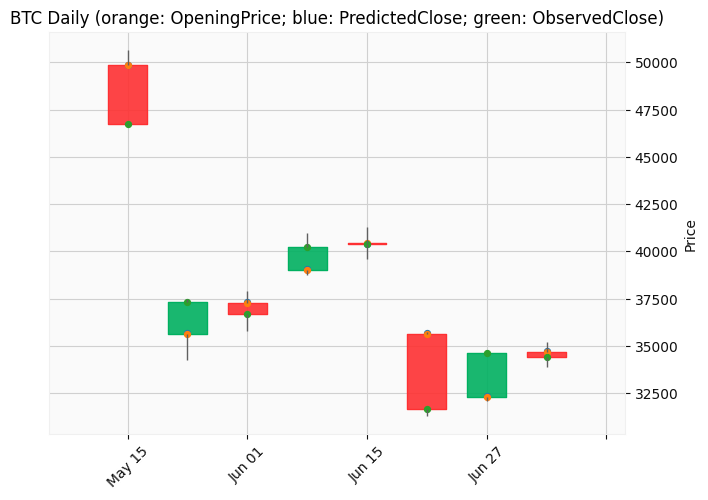

In [38]:
added_values_to_visualize = comparison_table_4_viz_btc_daily[['PredictedClose', 'Open', 'Close']]
apd  = mpf.make_addplot(added_values_to_visualize, type = 'scatter')
ticker = 'BTC Daily (orange: OpeningPrice; blue: PredictedClose; green: ObservedClose)'
fig, axes = mpf.plot(comparison_table_4_viz_btc_daily, type = 'candle', addplot = apd, returnfig = True, style = 'yahoo')
axes[0].set_title(ticker)
today = date.today().strftime('%Y-%m-%d')
fig.savefig(SA_results_path + 'btc_evaluation_viz_withfakepriceprediction_' + today + '.png')

# Legend: (not yet implemented in MPLFinance)
## green: Close
## blue: PredictedClose
## orange: Open

### Dogecoin (DOGE)

In [39]:
comparison_table_4_viz_doge_daily = comparison_table_doge_daily
comparison_table_4_viz_doge_daily["PredictedClose"] = np.where(comparison_table_4_viz_doge_daily["PredictedTrendbySA"] == 'bullish', comparison_table_4_viz_doge_daily["Open"] + 50, np.where(comparison_table_4_viz_doge_daily["PredictedTrendbySA"] == 'bearish', comparison_table_4_viz_doge_daily["Open"] - 50, comparison_table_4_viz_doge_daily["Open"]))
display(comparison_table_4_viz_doge_daily)

,DOGE_final_sentiment_daily,Open,High,Low,Close,Volume,EmpiricalPriceTrend,PredictedTrendbySA,ObservedTrend,PredictionIsCorrect,PredictedClose
Date,,,,,,,,,,,
2021-05-15,-1,0.559668,0.562676,0.491299,0.507972,9836892944,-0.051696,bearish,bearish,True,-49.440332
2021-05-31,-1,0.301949,0.329163,0.294330,0.325810,2440829325,0.023861,bearish,bullish,False,-49.698051
2021-06-01,-1,0.325744,0.383079,0.312360,0.370077,5796031087,0.044333,bearish,bullish,False,-49.674256
2021-06-14,3,0.323903,0.336927,0.320087,0.332085,1613812023,0.008182,bullish,bullish,True,50.323903
2021-06-15,-2,0.326785,0.330495,0.316976,0.328381,1687965230,0.001596,bearish,bullish,False,-49.673215
2021-06-21,3,0.280660,0.280889,0.166491,0.178691,5640232167,-0.101969,bullish,bearish,False,50.280660
2021-06-27,0,0.246045,0.266891,0.240894,0.264450,2167521670,0.018405,neutral,bullish,False,0.246045
2021-06-28,2,0.264918,0.266982,0.250762,0.256857,1932994784,-0.008061,bullish,bearish,False,50.264918


Text(0.5, 1.0, 'DOGE Daily (orange: OpeningPrice; blue: PredictedClose; green: ObservedClose)')

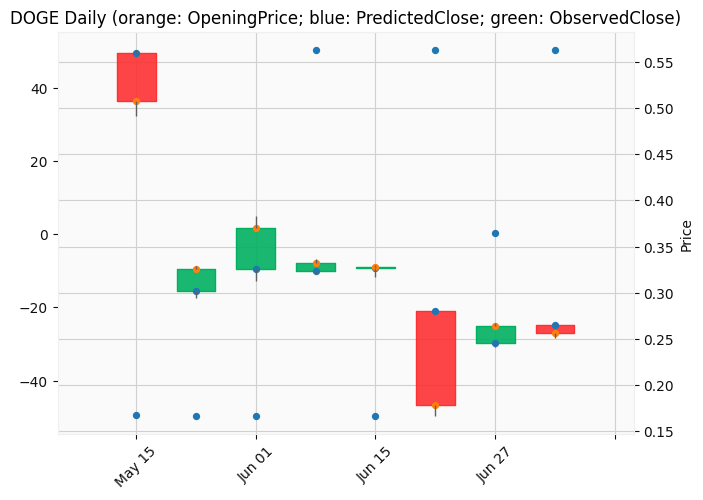

In [40]:
added_values_to_visualize = comparison_table_4_viz_doge_daily[['PredictedClose', 'Open', 'Close']]
apd  = mpf.make_addplot(added_values_to_visualize, type = 'scatter')
ticker = 'DOGE Daily (orange: OpeningPrice; blue: PredictedClose; green: ObservedClose)'
fig, axes = mpf.plot(comparison_table_4_viz_doge_daily, type = 'candle', addplot = apd, returnfig = True, style = 'yahoo')
axes[0].set_title(ticker)
today = date.today().strftime('%Y-%m-%d')
fig.savefig(SA_results_path + 'doge_evaluation_viz_withfakepriceprediction_' + today + '.png')

# Legend: (not yet implemented in MPLFinance)
## green: Close
## blue: PredictedClose
## orange: Open

### Ethereum (ETH)

In [41]:
comparison_table_4_viz_eth_daily = comparison_table_eth_daily
comparison_table_4_viz_eth_daily["PredictedClose"] = np.where(comparison_table_4_viz_eth_daily["PredictedTrendbySA"] == 'bullish', comparison_table_4_viz_eth_daily["Open"] + 50, np.where(comparison_table_4_viz_eth_daily["PredictedTrendbySA"] == 'bearish', comparison_table_4_viz_eth_daily["Open"] - 50, comparison_table_4_viz_eth_daily["Open"]))
display(comparison_table_4_viz_eth_daily)

,ETH_final_sentiment_daily,Open,High,Low,Close,Volume,EmpiricalPriceTrend,PredictedTrendbySA,ObservedTrend,PredictionIsCorrect,PredictedClose
Date,,,,,,,,,,,
2021-05-15,1,4075.951660,4129.185547,3638.122070,3638.122070,42422321751,-437.829590,bullish,bearish,False,4125.951660
2021-05-31,2,2387.198486,2715.854980,2279.505127,2714.945312,31007383150,327.746826,bullish,bullish,True,2437.198486
2021-06-01,-4,2707.560547,2739.737549,2531.160645,2633.518311,27363223090,-74.042236,bearish,bearish,True,2657.560547
2021-06-14,2,2508.770508,2606.432861,2469.388184,2537.891113,26964576331,29.120605,bullish,bullish,True,2558.770508
2021-06-15,7,2587.762695,2639.229248,2515.153076,2610.936768,29005279219,23.174072,bullish,bullish,True,2637.762695
2021-06-21,-1,2245.317871,2259.464111,1867.185425,1888.447510,33745173825,-356.870361,bearish,bearish,True,2195.317871
2021-06-27,1,1830.996948,1979.958130,1811.245850,1978.894653,19885474742,147.897705,bullish,bullish,True,1880.996948
2021-06-28,0,1981.386475,2139.805420,1963.615479,2079.657471,25514602841,98.270996,neutral,bullish,False,1981.386475


Text(0.5, 1.0, 'ETH Daily (orange: OpeningPrice; blue: PredictedClose; green: ObservedClose)')

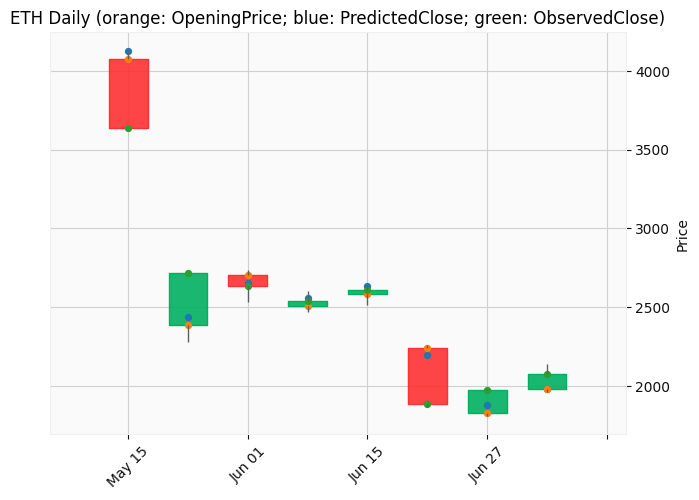

In [42]:
added_values_to_visualize = comparison_table_4_viz_eth_daily[['PredictedClose', 'Open', 'Close']]
apd  = mpf.make_addplot(added_values_to_visualize, type = 'scatter')
ticker = 'ETH Daily (orange: OpeningPrice; blue: PredictedClose; green: ObservedClose)'
fig, axes = mpf.plot(comparison_table_4_viz_eth_daily, type = 'candle', addplot = apd, returnfig = True, style = 'yahoo')
axes[0].set_title(ticker)
today = date.today().strftime('%Y-%m-%d')
fig.savefig(SA_results_path + 'eth_evaluation_viz_withfakepriceprediction_' + today + '.png')

# Legend: (not yet implemented in MPLFinance)
## green: Close
## blue: PredictedClose
## orange: Open

## Approach 2: Actual Sentiment Strength

### Bitcoin (BTC)

Text(0.5, 1.0, 'BTC Daily (orange: Extent of Sentiment --> positive: bullish; negative: bearish)')

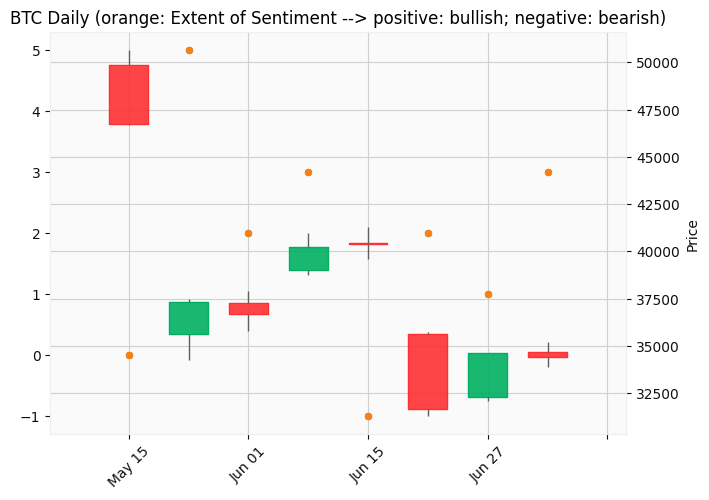

In [43]:
btc_added_values_to_visualize_daily = comparison_table_4_viz_btc_daily[['BTC_final_sentiment_daily']]
apds = [mpf.make_addplot(btc_added_values_to_visualize_daily, type = 'scatter'),
        mpf.make_addplot(comparison_table_4_viz_btc_daily['BTC_final_sentiment_daily'], type = 'scatter', secondary_y = 'auto')]
ticker = 'BTC Daily (orange: Extent of Sentiment --> positive: bullish; negative: bearish)'
fig, axes = mpf.plot(comparison_table_4_viz_btc_daily, type = 'candle', style = 'yahoo', addplot = apds, returnfig = True)
axes[0].set_title(ticker)
today = date.today().strftime('%Y-%m-%d')
fig.savefig(SA_results_path + 'btc_evaluation_viz_daily_' + today + '.png')

In [44]:
comparison_table_4_viz_btc_weekly = comparison_table_bitcoin_weekly
comparison_table_4_viz_btc_weekly["PredictedClose"] = np.where(comparison_table_4_viz_btc_weekly["PredictedTrendbySA"] == 'bullish', comparison_table_4_viz_btc_weekly["Open"] + 50, np.where(comparison_table_4_viz_btc_weekly["PredictedTrendbySA"] == 'bearish', comparison_table_4_viz_btc_weekly["Open"] - 50, comparison_table_4_viz_btc_weekly["Open"]))
comparison_table_4_viz_btc_weekly["WeekNumber"] = comparison_table_4_viz_btc_weekly.index
comparison_table_4_viz_btc_weekly.set_index('Date', inplace = True)
display(comparison_table_4_viz_btc_weekly)

,BTC_final_sentiment_weekly,Open,High,Low,Close,Volume,EmpiricalPriceTrend,PredictedTrendbySA,ObservedTrend,PredictionIsCorrect,PredictedClose,WeekNumber
Date,,,,,,,,,,,,
2021-05-10,0,58250.871094,59519.355469,43963.351562,46456.058594,483967915938,-11794.812500,neutral,bearish,False,58250.871094,19
2021-05-31,7,35658.593750,39478.953125,34241.945312,35862.378906,248884892724,203.785156,bullish,bullish,True,35708.593750,22
2021-06-14,2,39016.968750,41295.269531,33432.074219,35698.296875,269949570053,-3318.671875,bullish,bearish,False,39066.968750,24
2021-06-21,3,35641.144531,35721.640625,28893.621094,34649.644531,305541799334,-991.500000,bullish,bearish,False,35691.144531,25
2021-06-28,3,34679.121094,36542.109375,32770.679688,34668.546875,206804910559,-10.574219,bullish,bearish,False,34729.121094,26


Text(0.5, 1.0, 'BTC Weekly (orange: Extent of Sentiment --> positive: bullish; negative: bearish)')

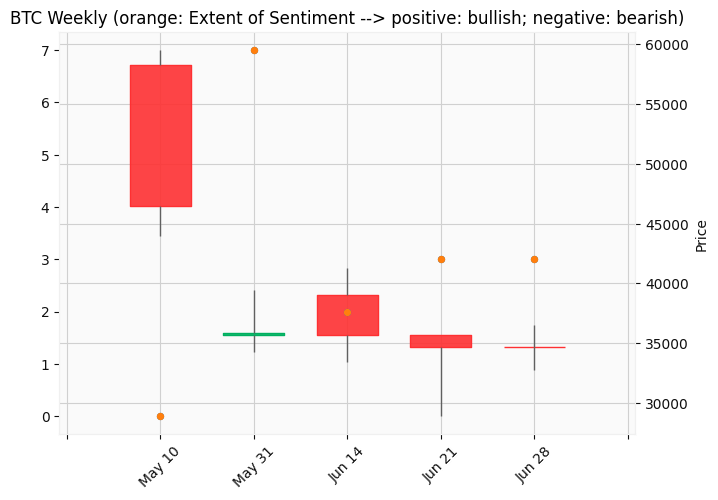

In [45]:
btc_added_values_to_visualize_weekly = comparison_table_4_viz_btc_weekly[['BTC_final_sentiment_weekly']]
apds = [mpf.make_addplot(btc_added_values_to_visualize_weekly, type = 'scatter'),
        mpf.make_addplot(comparison_table_4_viz_btc_weekly['BTC_final_sentiment_weekly'], type = 'scatter', secondary_y = 'auto')]
ticker = 'BTC Weekly (orange: Extent of Sentiment --> positive: bullish; negative: bearish)'
fig, axes = mpf.plot(comparison_table_4_viz_btc_weekly, type = 'candle', style = 'yahoo', addplot = apds, returnfig = True)
axes[0].set_title(ticker)
today = date.today().strftime('%Y-%m-%d')
fig.savefig(SA_results_path + 'btc_evaluation_viz_weekly_' + today + '.png')

### Dogecoin (DOGE)

Text(0.5, 1.0, 'DOGE Daily (orange: Extent of Sentiment --> positive: bullish; negative: bearish)')

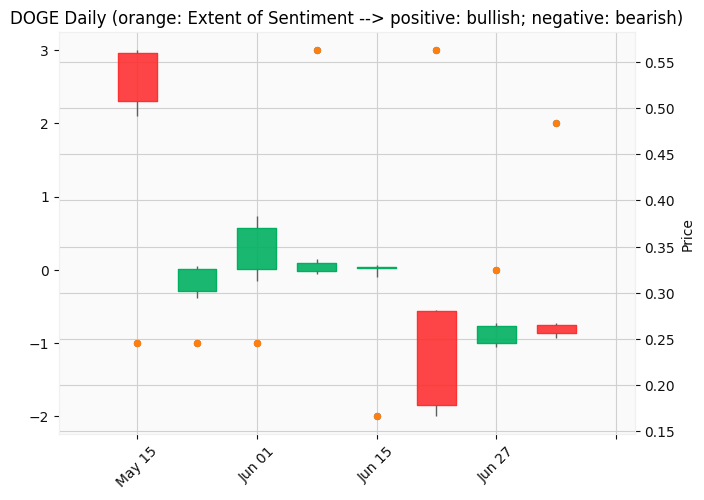

In [59]:
doge_added_values_to_visualize_daily = comparison_table_4_viz_doge_daily[['DOGE_final_sentiment_daily']]
apds = [mpf.make_addplot(doge_added_values_to_visualize_daily, type = 'scatter'),
        mpf.make_addplot(comparison_table_4_viz_doge_daily['DOGE_final_sentiment_daily'], type = 'scatter', secondary_y = 'auto')]
ticker = 'DOGE Daily (orange: Extent of Sentiment --> positive: bullish; negative: bearish)'
fig, axes = mpf.plot(comparison_table_4_viz_doge_daily, type = 'candle', style = 'yahoo', addplot = apds, returnfig = True)
axes[0].set_title(ticker)
today = date.today().strftime('%Y-%m-%d')
fig.savefig(SA_results_path + 'doge_evaluation_viz_daily_' + today + '.png')

In [47]:
comparison_table_4_viz_doge_weekly = comparison_table_dogecoin_weekly
comparison_table_4_viz_doge_weekly["PredictedClose"] = np.where(comparison_table_4_viz_doge_weekly["PredictedTrendbySA"] == 'bullish', comparison_table_4_viz_doge_weekly["Open"] + 50, np.where(comparison_table_4_viz_doge_weekly["PredictedTrendbySA"] == 'bearish', comparison_table_4_viz_doge_weekly["Open"] - 50, comparison_table_4_viz_doge_weekly["Open"]))
comparison_table_4_viz_doge_weekly["WeekNumber"] = comparison_table_4_viz_doge_weekly.index
comparison_table_4_viz_doge_weekly.set_index('Date', inplace = True)
display(comparison_table_4_viz_doge_weekly)

,DOGE_final_sentiment_weekly,Open,High,Low,Close,Volume,EmpiricalPriceTrend,PredictedTrendbySA,ObservedTrend,PredictionIsCorrect,PredictedClose,WeekNumber
Date,,,,,,,,,,,,
2021-05-10,-1,0.569687,0.589690,0.357175,0.514895,98210631242,-0.054792,bearish,bearish,True,-49.430313,19
2021-05-31,-2,0.301949,0.444590,0.294330,0.371807,37662982421,0.069858,bearish,bullish,False,-49.698051,22
2021-06-14,1,0.323903,0.336927,0.256467,0.280900,10627230130,-0.043003,bullish,bearish,False,50.323903,24
2021-06-21,3,0.280660,0.289145,0.164654,0.264450,30935547695,-0.016210,bullish,bearish,False,50.280660,25
2021-06-28,2,0.264918,0.274940,0.238268,0.246411,10875754673,-0.018507,bullish,bearish,False,50.264918,26


Text(0.5, 1.0, 'DOGE Weekly (orange: Extent of Sentiment --> positive: bullish; negative: bearish)')

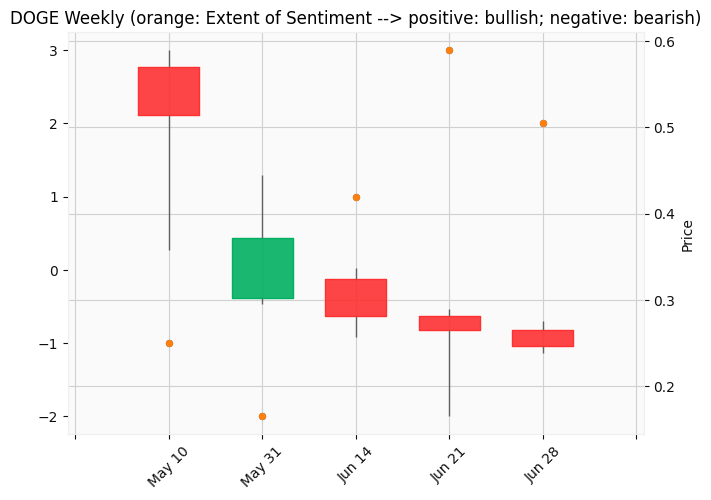

In [50]:
doge_added_values_to_visualize_weekly = comparison_table_4_viz_doge_weekly[['DOGE_final_sentiment_weekly']]
apds = [mpf.make_addplot(doge_added_values_to_visualize_weekly, type = 'scatter'),
        mpf.make_addplot(comparison_table_4_viz_doge_weekly['DOGE_final_sentiment_weekly'], type = 'scatter', secondary_y = 'auto')]
ticker = 'DOGE Weekly (orange: Extent of Sentiment --> positive: bullish; negative: bearish)'
fig, axes = mpf.plot(comparison_table_4_viz_doge_weekly, type = 'candle', style = 'yahoo', addplot = apds, returnfig = True)
axes[0].set_title(ticker)
today = date.today().strftime('%Y-%m-%d')
fig.savefig(SA_results_path + 'doge_evaluation_viz_weekly_' + today + '.png')

### Ethereum (ETH)

Text(0.5, 1.0, 'ETH Daily (orange: Extent of Sentiment --> positive: bullish; negative: bearish)')

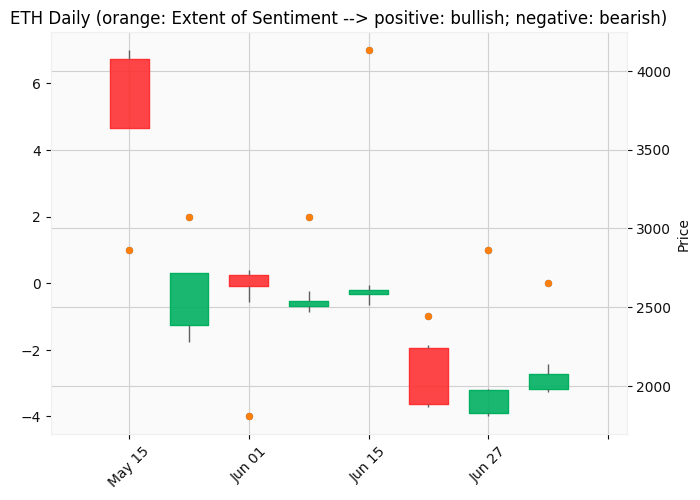

In [60]:
eth_added_values_to_visualize_daily = comparison_table_4_viz_eth_daily[['ETH_final_sentiment_daily']]
apds = [mpf.make_addplot(eth_added_values_to_visualize_daily, type = 'scatter'),
        mpf.make_addplot(comparison_table_4_viz_eth_daily['ETH_final_sentiment_daily'], type = 'scatter', secondary_y = 'auto')]
ticker = 'ETH Daily (orange: Extent of Sentiment --> positive: bullish; negative: bearish)'
fig, axes = mpf.plot(comparison_table_4_viz_eth_daily, type = 'candle', style = 'yahoo', addplot = apds, returnfig = True)
axes[0].set_title(ticker)
today = date.today().strftime('%Y-%m-%d')
fig.savefig(SA_results_path + 'eth_evaluation_viz_daily_' + today + '.png')

In [55]:
comparison_table_4_viz_eth_weekly = comparison_table_ethereum_weekly
comparison_table_4_viz_eth_weekly["PredictedClose"] = np.where(comparison_table_4_viz_eth_weekly["PredictedTrendbySA"] == 'bullish', comparison_table_4_viz_eth_weekly["Open"] + 50, np.where(comparison_table_4_viz_eth_weekly["PredictedTrendbySA"] == 'bearish', comparison_table_4_viz_eth_weekly["Open"] - 50, comparison_table_4_viz_eth_weekly["Open"]))
comparison_table_4_viz_eth_weekly["WeekNumber"] = comparison_table_4_viz_eth_weekly.index
#comparison_table_4_viz_eth_weekly.set_index('Date', inplace = True)
display(comparison_table_4_viz_eth_weekly)

,ETH_final_sentiment_weekly,Open,High,Low,Close,Volume,EmpiricalPriceTrend,PredictedTrendbySA,ObservedTrend,PredictionIsCorrect,PredictedClose,WeekNumber
Date,,,,,,,,,,,,
2021-05-10,1,3924.413330,4362.350586,3350.951660,3587.506104,400749195286,-336.907227,bullish,bearish,False,3974.413330,2021-05-10
2021-05-31,-2,2387.198486,2891.254883,2279.505127,2715.092773,206114234750,327.894287,bearish,bullish,False,2337.198486,2021-05-31
2021-06-14,9,2508.770508,2639.229248,2049.962646,2246.364502,165998018623,-262.406006,bullish,bearish,False,2558.770508,2021-06-14
2021-06-21,0,2245.317871,2259.464111,1707.600586,1978.894653,181271282626,-266.423218,neutral,bearish,False,2245.317871,2021-06-21
2021-06-28,0,1981.386475,2282.989014,1963.615479,2226.114258,154449059516,244.727783,neutral,bullish,False,1981.386475,2021-06-28


Text(0.5, 1.0, 'ETH Weekly (orange: Extent of Sentiment --> positive: bullish; negative: bearish)')

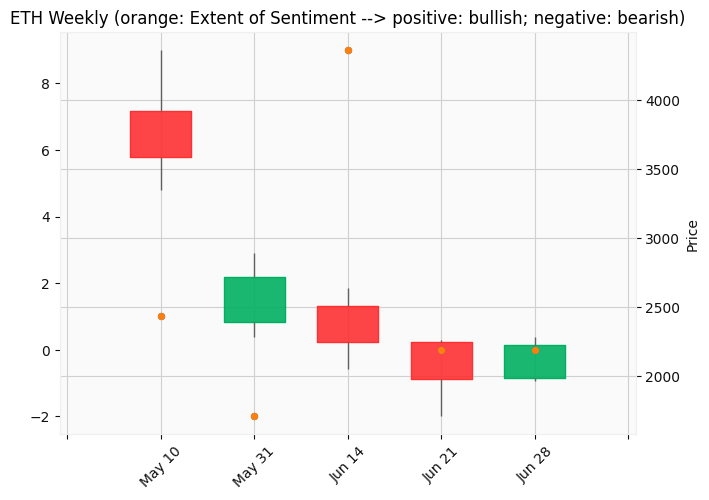

In [50]:
eth_added_values_to_visualize_weekly = comparison_table_4_viz_eth_weekly[['ETH_final_sentiment_weekly']]
apds = [mpf.make_addplot(eth_added_values_to_visualize_weekly, type = 'scatter'),
        mpf.make_addplot(comparison_table_4_viz_eth_weekly['ETH_final_sentiment_weekly'], type = 'scatter', secondary_y = 'auto')]
ticker = 'ETH Weekly (orange: Extent of Sentiment --> positive: bullish; negative: bearish)'
fig, axes = mpf.plot(comparison_table_4_viz_eth_weekly, type = 'candle', style = 'yahoo', addplot = apds, returnfig = True)
axes[0].set_title(ticker)
today = date.today().strftime('%Y-%m-%d')
fig.savefig(SA_results_path + 'eth_evaluation_viz_weekly_' + today + '.png')

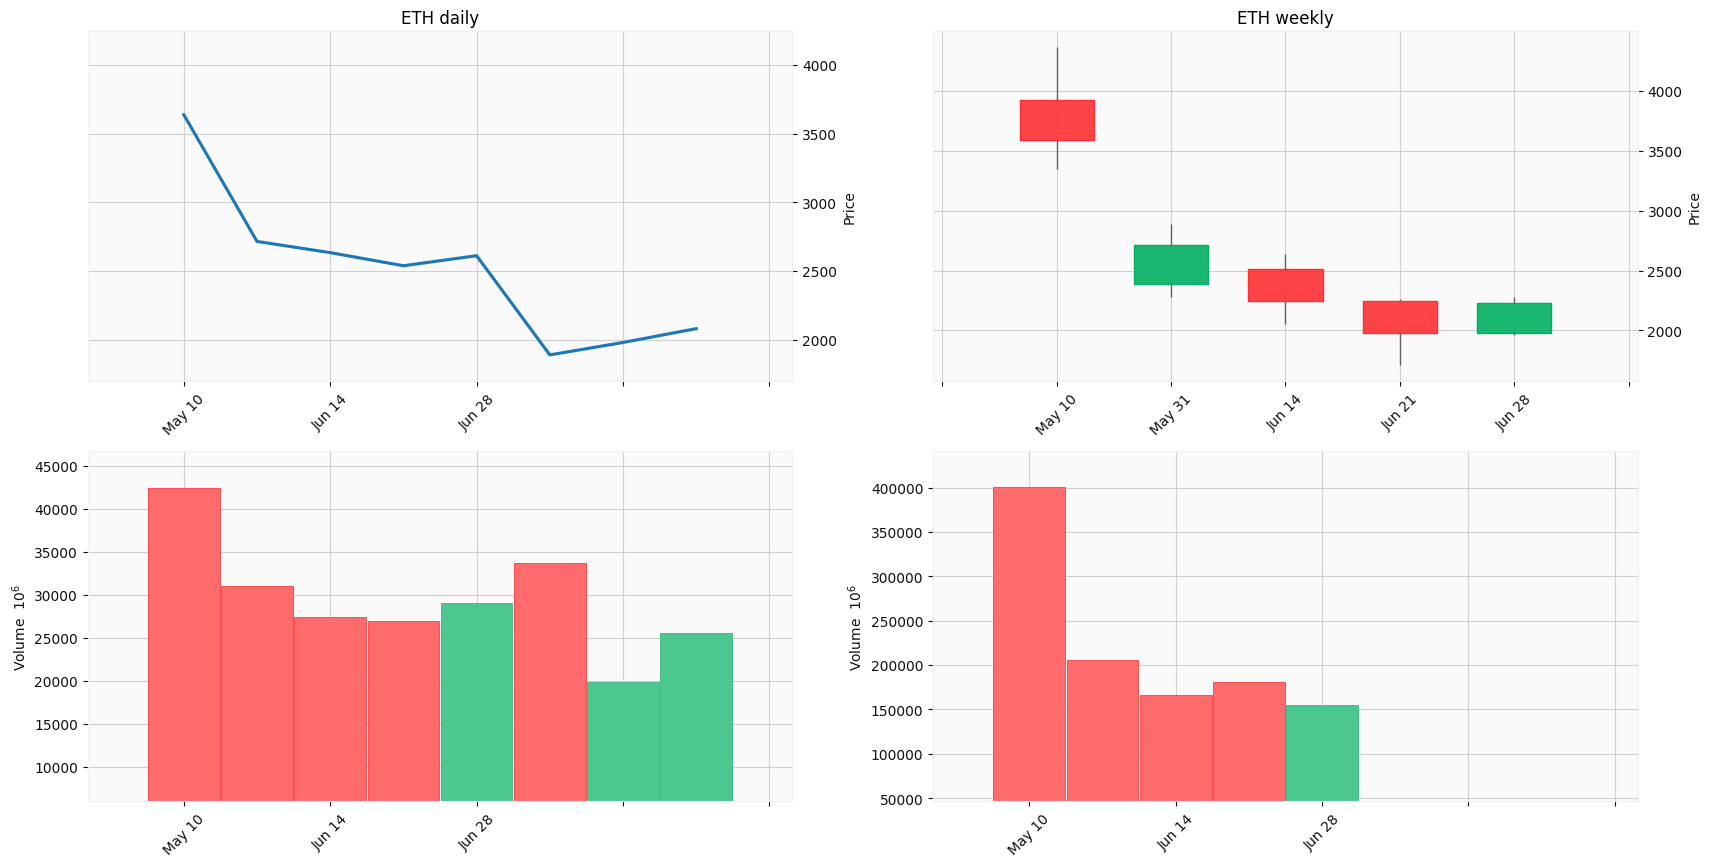

In [74]:
# Day Chart vs. Week Chart
fig = mpf.figure(figsize = (20,10), style = 'yahoo')
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

av1 = fig.add_subplot(2,2,3, sharex = ax1)
av2 = fig.add_subplot(2,2,4, sharex = ax1)

mpf.plot(comparison_table_4_viz_eth_daily, type = 'line', style = 'yahoo', axtitle ="ETH daily", volume = av1, ax = ax1)
mpf.plot(comparison_table_4_viz_eth_weekly, type = 'candle', style = 'yahoo', axtitle ="ETH weekly", volume = av2, ax = ax2)

# eth_added_values_to_visualize_weekly = comparison_table_4_viz_eth_weekly[['ETH_final_sentiment_weekly']]
# apds_eth_weekly = [mpf.make_addplot(eth_added_values_to_visualize_weekly, type = 'scatter'), mpf.make_addplot(comparison_table_4_viz_eth_weekly['ETH_final_sentiment_weekly'], type = 'scatter', secondary_y = 'auto')]
# eth_added_values_to_visualize_daily = comparison_table_4_viz_eth_daily[['ETH_final_sentiment_daily']]
# apds_eth_daily = [mpf.make_addplot(eth_added_values_to_visualize_daily, type = 'scatter'), mpf.make_addplot(comparison_table_4_viz_eth_daily['ETH_final_sentiment_daily'], type = 'scatter', secondary_y = 'auto')]
# mpf.plot(comparison_table_4_viz_eth_daily, type = 'line', style = 'yahoo', axtitle ="ETH daily", volume = av1, addplot = apds_eth_daily, ax = ax1)
# mpf.plot(comparison_table_4_viz_eth_weekly, type = 'candle', style = 'yahoo', axtitle ="ETH weekly", volume = av1, addplot = apds_eth_weekly, ax = ax2)